# South African Language Identification Hack 2023

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Overview</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing packages and Libraries</a>

<a href=#four>4. Data Loading and Preprocessing</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Identifying which language a text is in from 11 languages from SA</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Logistics Regression Classification Model</a>

<a href=#nine>9. K Nearest Neighbors (KNN) Classification Mode</a>

<a href=#ten>10. Support Vector Machine Classification Model</a>

<a href=#eleven>11. Building the Multinomial Naive Bayes Model</a>

<a href=#twelve>12. Decision Tree Classification Model</a>

<a href=#thirteen>13. AdaBoost Classification Model</a>

<a href=#fourteen>14. Conclusion</a>

 <a id="one"></a>
## 1.  Overview
<a href=#cont>Back to Table of Contents</a>

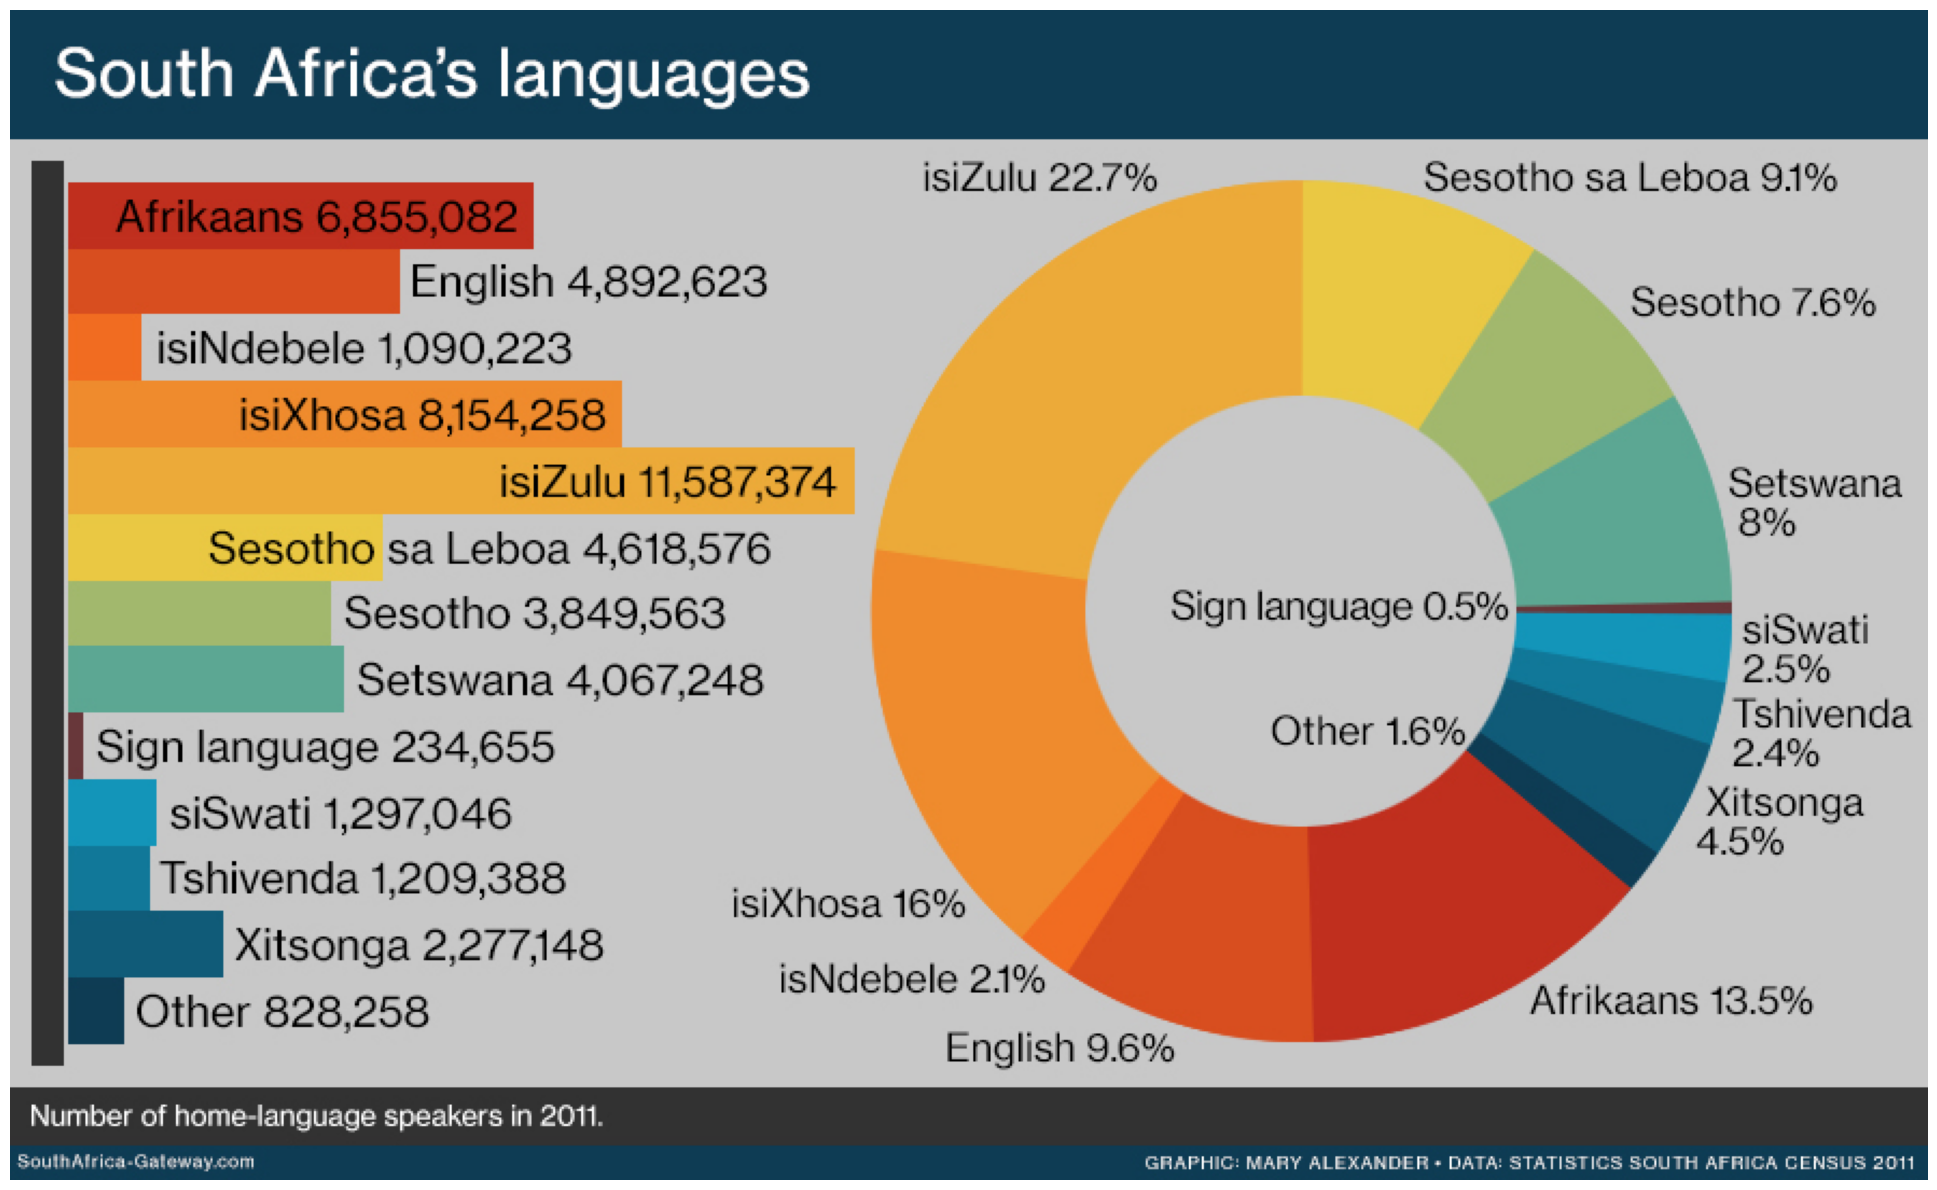

In [157]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread(r"C:\Users\nengo\Downloads\SA_languages.jpg")

# Set the figure size to make the image larger
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels


# Center the image within the notebook cell
plt.tight_layout()
plt.show()


        South Africa is a multicultural society with rich linguistic diversity. 
        Its 11 official languages hold equal status and play crucial roles in enhancing democracy
        and enriching various aspects of social, cultural, economic, and political life. 
        The majority of South Africans are multilingual, proficient in speaking two or more official languages.

 <a id="two"></a>
## 2. Problem statement
<a href=#cont>Back to Table of Contents</a>

Develop a language identification system capable of accurately determining the language of a given text among South Africa's 11 Official languages. The objective is to create a robust Natural Language Processing (NLP) model that can effectively classify input text into one of the following languages: Zulu, Xhosa, Afrikaans, English, Northern Sotho, Southern Sotho, Tswana, Swati, Venda, Tsonga, or Ndebele.

<a id="three"></a>
## 3. Importing packages and Libraries
<a href=#cont>Back to Table of Contents</a>
        
        Packages and libraries that we will use in the project

In [233]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from langdetect import detect

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer

from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from nltk import ngrams
from collections import defaultdict


<a id="four"></a>
## 4. Data Loading and Preprocessing
<a href=#cont>Back to Table of Contents</a>

***Loading Data***

In [234]:
train_df = pd.read_csv(r"C:\Users\nengo\Downloads\south-african-language-identification-hack-2023\train_set.csv")
test_df = pd.read_csv(r"C:\Users\nengo\Downloads\south-african-language-identification-hack-2023\test_set.csv")

In [235]:
train_df.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [236]:
test_df.head()

index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.

In [184]:
# Check shape of datasets
print(train_df.shape)
print(test_df.shape)

(33000, 2)
(5682, 2)


In [185]:
# Check for missing values
print(train_df.isna().sum())
print(test_df.isna().sum())

lang_id    0
text       0
dtype: int64
index    0
text     0
dtype: int64


In [186]:
# Check information of test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [187]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


***Data Preprocessing***

In [188]:
def preprocess_data(train_df, test_df):
    # Initializing the Count Vectorizer
    vectorizer = CountVectorizer()

    # Fitting the vectorizer on the training data
    vectorizer.fit(train_df['text'])

    # Transforming the training and test data using the fitted vectorizer
    train_features = vectorizer.transform(train_df['text'])
    test_features = vectorizer.transform(test_df['text'])

    return train_features, test_features, vectorizer


In [189]:
train_features, test_features, vectorizer = preprocess_data(train_df, test_df)

In [190]:
# Check unique lang_id in train_df
train_df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [191]:
# Check unique index in train_df
test_df['index'].unique()

array([   1,    2,    3, ..., 5680, 5681, 5682], dtype=int64)

<a id="five"></a>
## 5. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

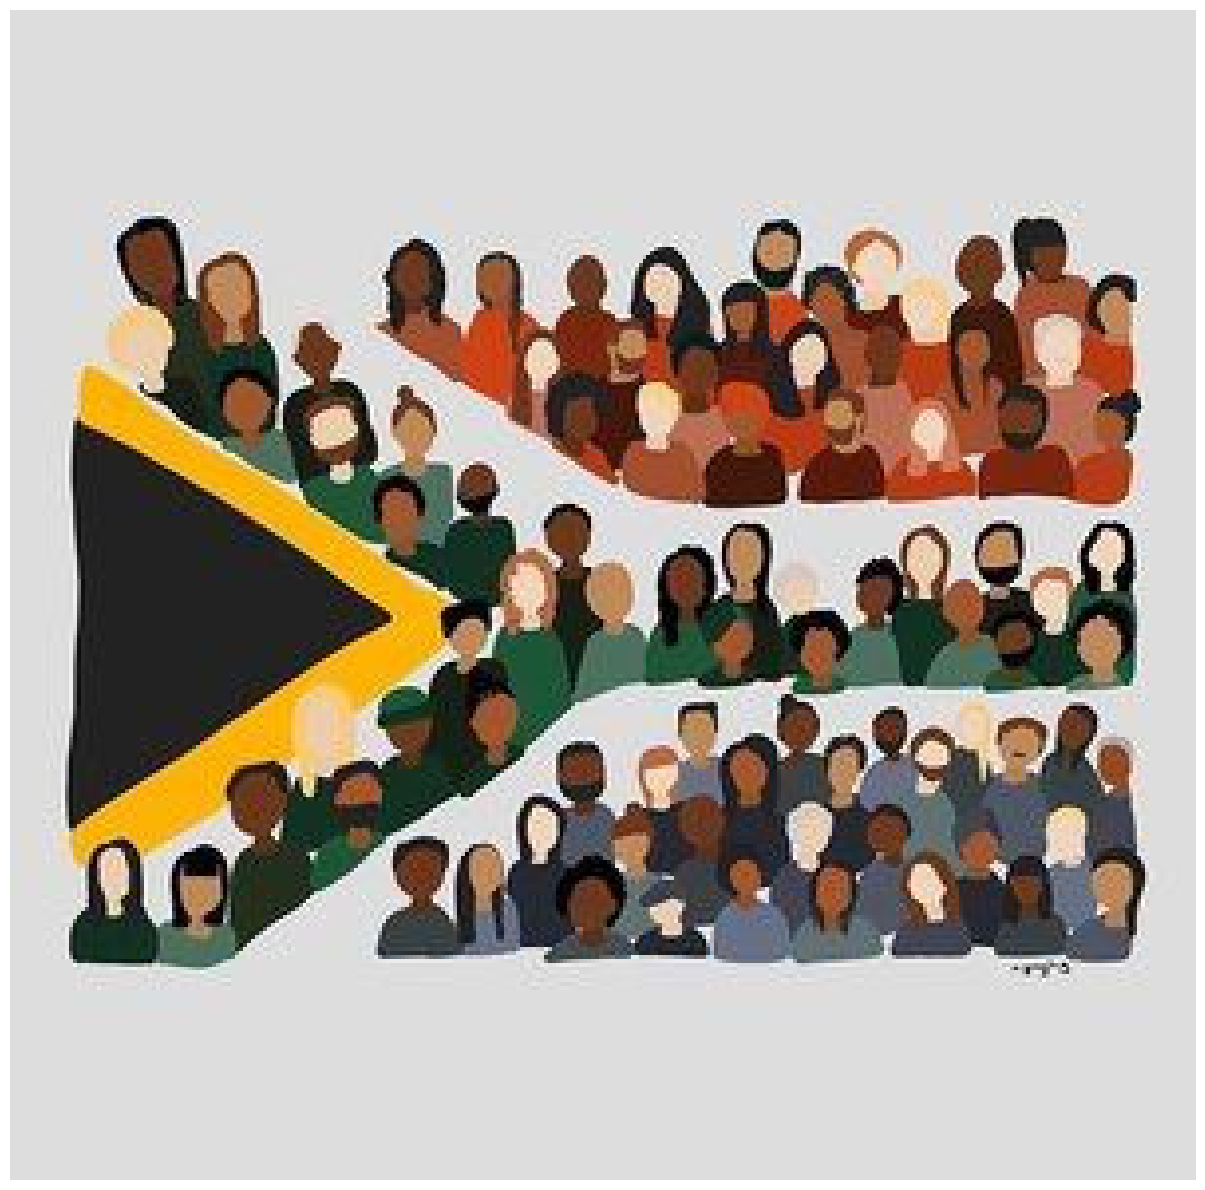

In [132]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread(r"C:\Users\nengo\Downloads\a7c7d4c3ca374b21465e844abd1c1e5b.jpg")

# Set the figure size to make the image larger
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels


# Center the image within the notebook cell
plt.tight_layout()
plt.show()

### Language Distribution Analysis:

***Bar Chart***

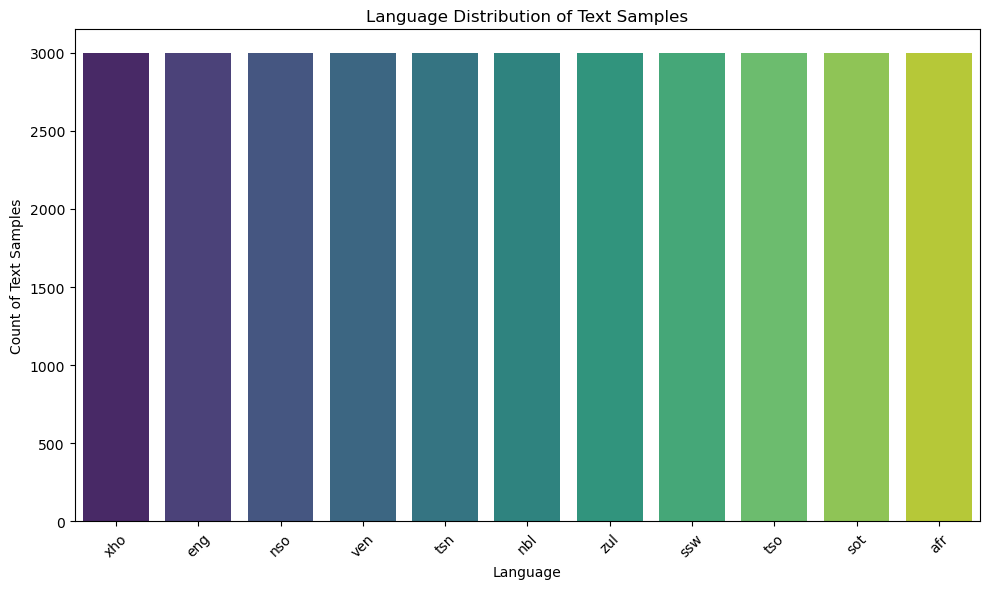

In [133]:
# Concatenate train_df and test_df for combined analysis (if needed)
combined_df = pd.concat([train_df, test_df])

# Calculate count of text samples in each language for combined data
language_counts = combined_df['lang_id'].value_counts()

# Plotting the distribution of text samples across each language using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.title('Language Distribution of Text Samples')
plt.xlabel('Language')
plt.ylabel('Count of Text Samples')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

***Pie Chart***

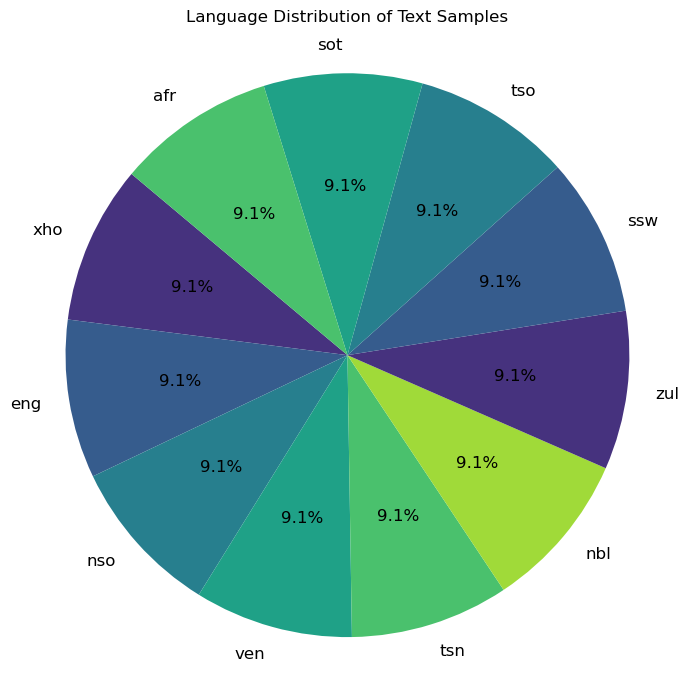

In [134]:
# Alternatively, you can create a pie chart to show the distribution in percentages
plt.figure(figsize=(7, 7))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), textprops={'fontsize': 12})
plt.title('Language Distribution of Text Samples')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

     The pie chart visually represents the distribution of different languages present in the provided text samples. 
     Each segment of the pie chart represents a language, with the size of the segment proportional to the percentage 
     of text samples written in that language. The chart gives insight on the relative proportions 
     of different languages within the dataset

***Machine Learning Model Exploration:***

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['lang_id'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Define classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    clf = make_pipeline(tfidf_vectorizer, classifier)
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_val)
    
    # Evaluation
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    
    print(f"\n{name} Classifier Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("---------------------------------------------------\n")


Training Multinomial Naive Bayes...

Multinomial Naive Bayes Classifier Evaluation:
Accuracy: 0.9980
Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

---------------------------------------------------

Training 


        The code trains three different machine learning models (Multinomial Naive Bayes, Logistic Regression,
        and Random Forest) using text data transformed into numerical features (TF-IDF representation) and known 
        language labels.

        After training, the models are tested with a new set of text samples (the validation set).
        These unseen samples are used to predict their language using the trained models. 
        The evaluation measures how accurately each model identifies the language of the new text samples, 
        providing insights into their performance in language identification on unseen data.






In [136]:
train_df.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [137]:
train_df.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [138]:
test_df.head()

index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.

### Text Length Distribution:

***Box Plots***

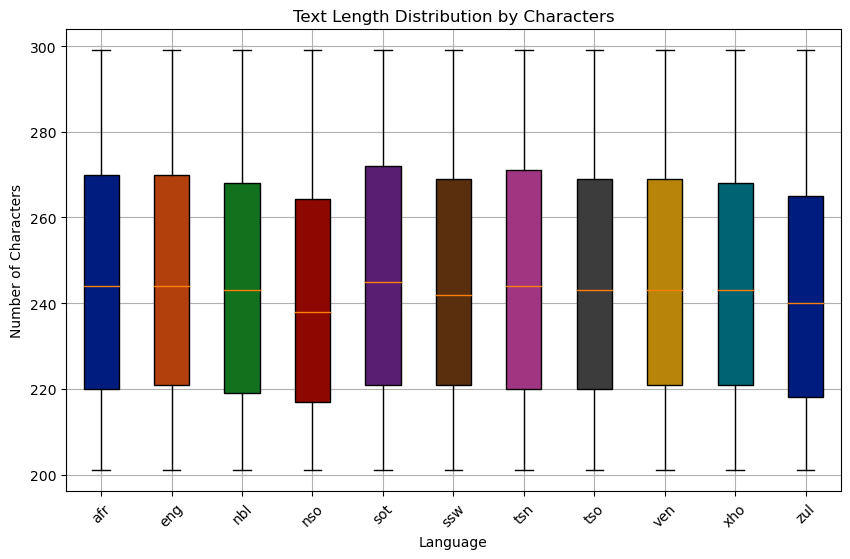

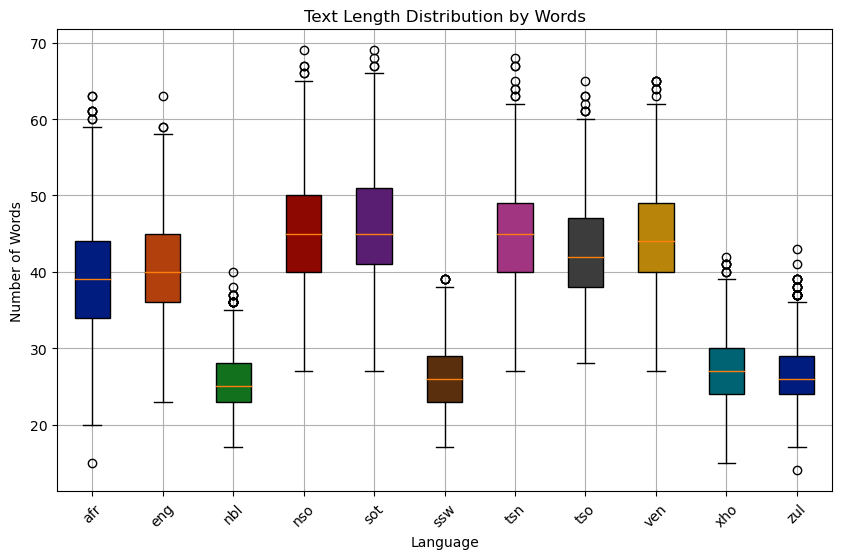

In [170]:
# Calculate text lengths for each entry in the 'text' column
train_df['text_length_characters'] = train_df['text'].apply(lambda x: len(x))
train_df['text_length_words'] = train_df['text'].apply(lambda x: len(x.split()))

# Group text lengths by language
grouped_by_language_chars = train_df.groupby('lang_id')['text_length_characters'].apply(list).to_dict()
grouped_by_language_words = train_df.groupby('lang_id')['text_length_words'].apply(list).to_dict()

# Get distinct darker colors for each language
num_languages = len(grouped_by_language_chars)
palette = sns.color_palette("dark", num_languages)

# Plot boxplots for text length distributions (characters) with darker colors for each language
plt.figure(figsize=(10, 6))
box = plt.boxplot(grouped_by_language_chars.values(), labels=grouped_by_language_chars.keys(), patch_artist=True)

# Set darker colors for each box in the boxplot
for patch, color in zip(box['boxes'], palette):
    patch.set_facecolor(color)

plt.title('Text Length Distribution by Characters')
plt.xlabel('Language')
plt.ylabel('Number of Characters')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot boxplots for text length distributions (words) with darker colors for each language
plt.figure(figsize=(10, 6))
box = plt.boxplot(grouped_by_language_words.values(), labels=grouped_by_language_words.keys(), patch_artist=True)

# Set darker colors for each box in the boxplot
for patch, color in zip(box['boxes'], palette):
    patch.set_facecolor(color)

plt.title('Text Length Distribution by Words')
plt.xlabel('Language')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


***Mean Text Length:***
Characters: Average number of characters per text in a language.
Words: Average number of words per text in a language.
Higher means suggest longer average texts in terms of characters or words for a specific language.

***Outliers in Text Length Distributions:***
Uncommon data points significantly deviating from the typical text length in a language.
They could represent extremely short or long texts, errors in data, or unique instances that differ significantly from the norm for that language.

***Median Text Length:***
Characters/Words: Represents the middle value in the sorted list of text lengths.
Less sensitive to extreme values compared to the mean.
Provides a measure of central tendency.

***Maximum Text Length:***
Characters/Words: Indicates the longest text within a language's dataset.
Represents the upper limit of text lengths.

***Minimum Text Length:***
Characters/Words: Represents the shortest text within a language's dataset.
Indicates the lower limit of text lengths.

***Bar Graphs***

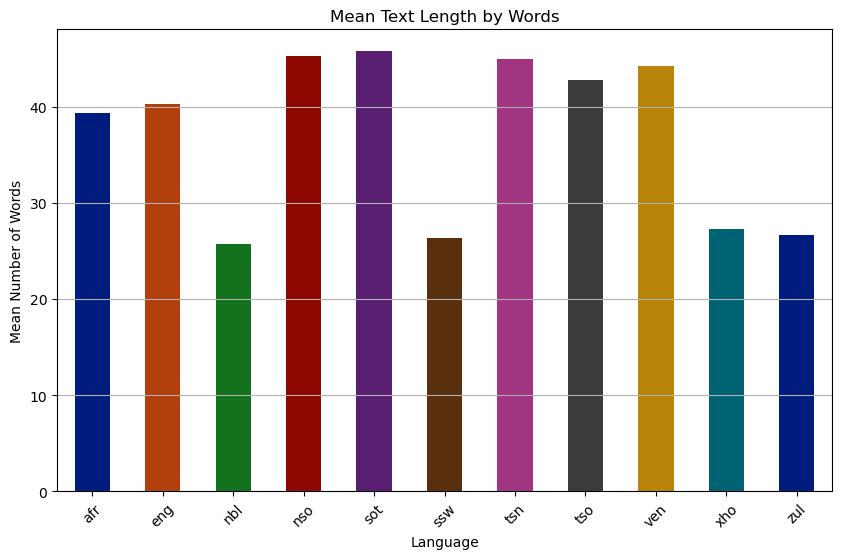

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palettes

# Calculate mean text lengths for each language
mean_chars_by_language = train_df.groupby('lang_id')['text_length_characters'].mean()
mean_words_by_language = train_df.groupby('lang_id')['text_length_words'].mean()

# Get distinct dark colors for each language
num_languages = len(mean_chars_by_language)
palette = sns.color_palette('dark', num_languages)


# Plot bar graph for mean text length distributions (words) with different dark colors
plt.figure(figsize=(10, 6))
mean_words_by_language.plot(kind='bar', color=palette)
plt.title('Mean Text Length by Words')
plt.xlabel('Language')
plt.ylabel('Mean Number of Words')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


***The bar graph shows the distribution of the total number of  different words across all 11 languages***   

        Sotho language ,Tswana language, respectively followed by Venda language has the highest number of words
          Ndebele language folowed by Siswati has the least number of words.

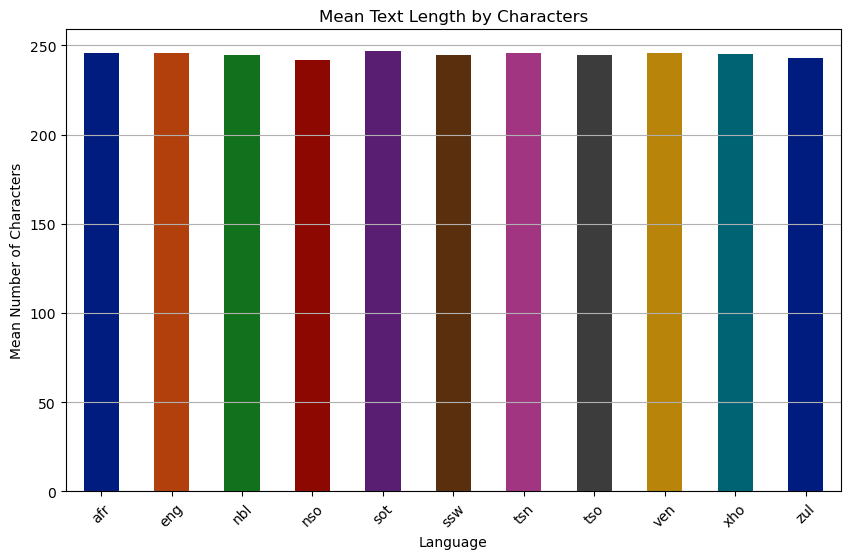

In [172]:
# Plot bar graph for mean text length distributions (characters) with different dark colors
plt.figure(figsize=(10, 6))
mean_chars_by_language.plot(kind='bar', color=palette)
plt.title('Mean Text Length by Characters')
plt.xlabel('Language')
plt.ylabel('Mean Number of Characters')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

***The bar graph shows the distribution of the total number of  different characters across all 11 languages***   

        Tswana language, has the lowest mean value of character compared to all 11 languages of the country
          Sotho language has the highest number of characters compared to all the langauages of the the country.

***Pie charts***

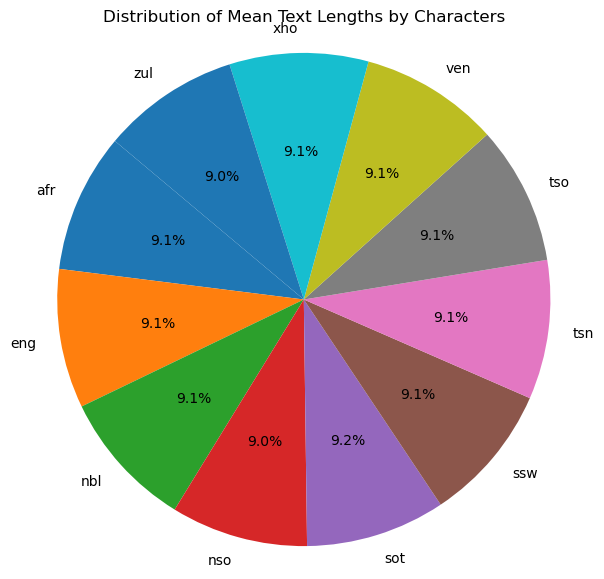

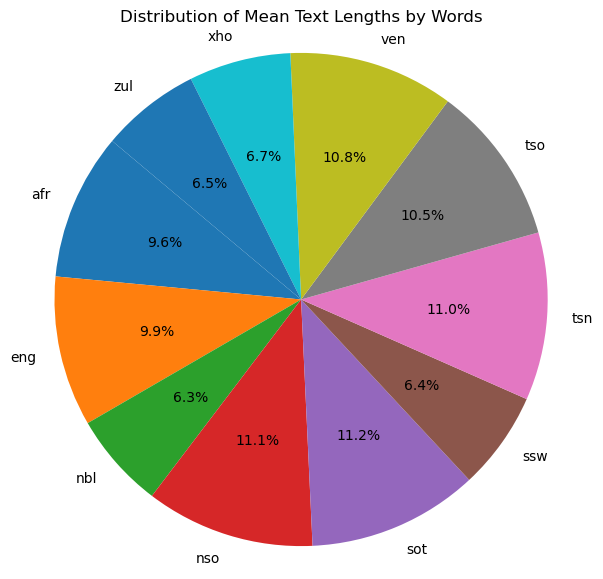

In [173]:
# Calculate mean text lengths for each language
mean_chars_by_language = train_df.groupby('lang_id')['text_length_characters'].mean()

# Create a pie chart for the distribution of mean text lengths by characters
plt.figure(figsize=(7, 7))
plt.pie(mean_chars_by_language, labels=mean_chars_by_language.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mean Text Lengths by Characters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculate mean text lengths for each language
mean_words_by_language = train_df.groupby('lang_id')['text_length_words'].mean()

# Create a pie chart for the distribution of mean text lengths by words
plt.figure(figsize=(7, 7))
plt.pie(mean_words_by_language, labels=mean_words_by_language.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mean Text Lengths by Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



***These Pie chart shows the percentage distribution of the characters and words in the 11 languages found in the South Africa***

In [174]:
import pandas as pd
from langdetect import detect
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


texts = train_df['text']

# Function to detect language for each text sample
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply language detection to each text sample
train_df['detected_language'] = texts.apply(detect_language)

# Function to compare basic features of text in different languages
def compare_languages(texts):
    language_features = {}

    for index, text in texts.iteritems():
        language = train_df.loc[index, 'detected_language']
        if language not in language_features:
            language_features[language] = {
                'text_samples': [],
                'word_tokens': []
            }
        language_features[language]['text_samples'].append(text)
        language_features[language]['word_tokens'].extend(word_tokenize(text))

    for language, features in language_features.items():
        print(f"Language: {language}")
        print(f"Number of text samples: {len(features['text_samples'])}")
        print(f"Number of word tokens: {len(features['word_tokens'])}")
        print("Some text samples:")
        for sample in features['text_samples'][:3]:  # Print first 3 samples
            print(sample)
        print("-------------------------------")

# Compare basic features of text in different languages
compare_languages(texts)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nengo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\nengo\AppData\Local\Temp\ipykernel_3588\3675138251.py:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, text in texts.iteritems():


Language: sw
Number of text samples: 18508
Number of word tokens: 631375
Some text samples:
umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso
-------------------------------
Language: en
Number of text samples: 3314
Number of word tokens: 133961
Some text samples:
the province of kwazulu-natal department of transport invites tenders f

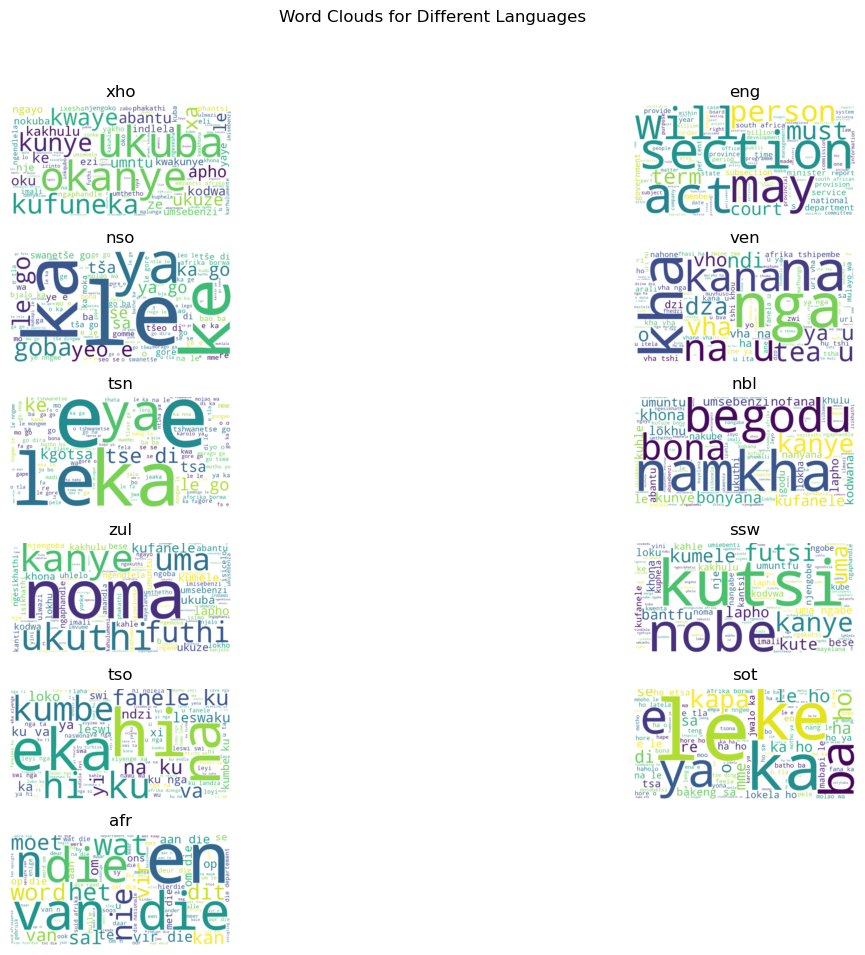

In [175]:
from wordcloud import WordCloud

plt.figure(figsize=(14, 10))
unique_languages = train_df['lang_id'].unique()
num_languages = len(unique_languages)

# Determine the optimal subplot grid shape
rows = int((num_languages - 1) / 2) + 1
cols = 2 if num_languages > 1 else 1

for idx, lang in enumerate(unique_languages):
    subset = train_df[train_df['lang_id'] == lang]
    text = ' '.join(subset['text'].tolist())
    
    plt.subplot(rows, cols, idx + 1)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(lang)
    plt.axis('off')

plt.suptitle('Word Clouds for Different Languages')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<a id="six"></a>
## 6.  Identifying the language of a text from South Africa involves recognizing among the 11 official languages:
<a href=#cont>Back to Table of Contents</a>

            isiZulu, isiXhosa, Afrikaans, English, Sesotho sa Leboa (Northern Sotho), Setswana, 
            Sesotho (Southern Sotho), Xitsonga (Tsonga), siSwati (Swati), Tshivenda, and isiNdebele. Each language exhibits 
            distinct grammatical structures, vocabulary, and linguistic characteristics. 
            Accurate language identification relies on recognizing these unique linguistic traits
            present in the text to assign it to the appropriate South African language.

In [176]:
from langdetect import detect
import pandas as pd

def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        return str(e)

# Function to predict language for each row in test_df
def predict_languages(test_df):
    predicted_languages = []
    for index, row in test_df.iterrows():
        detected_language = detect_language(row['text'])
        predicted_languages.append(detected_language)
    return predicted_languages

# Predict languages for texts in test_df
test_df['predicted_language'] = predict_languages(test_df)


In [146]:
train_df.head()

lang_id                                               text  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...   
2     eng  the province of kwazulu-natal department of tr...   
3     nso  o netefatša gore o ba file dilo ka moka tše le...   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...   

   text_length_characters  text_length_words detected_language  
0                     220                 24                sw  
1                     252                 31                sw  
2                     264                 37                en  
3                     217                 40                it  
4                     239                 43                sw

<a id="seven"></a>
## 7. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

   ***Character n-grams or Byte-Pair Encoding (BPE):***                                                                                                 
    
    
    This code generates and counts character n-grams for the text data present in the 'text'
    column of the DataFrame, allowing the analysis of character-level patterns within the provided texts.

In [192]:
from collections import Counter

# Function to generate character n-grams for a given text
def generate_ngrams(text, n):
    text = text.lower()  # Convert text to lowercase for consistency
    
    # Generate character n-grams
    ngrams = [text[i:i + n] for i in range(len(text) - n + 1)]
    
    return ngrams

# Example DataFrame 'train_df' containing text data
# Replace this with your actual DataFrame and column name
data = {
    'text': [
        "This is an English sentence.",
        "Ceci est une phrase en français.",
        "Leli phepha liyisisekelo esifundeni saZulu.",
        "Dit is 'n voorbeeldsin in Afrikaans."
    ]
}
train_df = pd.DataFrame(data)

# Define the n-gram size
n = 3  # Change this value to generate different n-grams (e.g., 2 for bi-grams, 4 for quad-grams, etc.)

# Generate n-grams for each text in the DataFrame
for index, row in train_df.iterrows():
    text = row['text']
    ngrams = generate_ngrams(text, n)
    ngram_counts = Counter(ngrams)
    print(f"Row {index + 1}:")
    print(f"{n}-gram Counts:")
    print(ngram_counts)
    print("\n")


Row 1:
3-gram Counts:
Counter({'is ': 2, 'thi': 1, 'his': 1, 's i': 1, ' is': 1, 's a': 1, ' an': 1, 'an ': 1, 'n e': 1, ' en': 1, 'eng': 1, 'ngl': 1, 'gli': 1, 'lis': 1, 'ish': 1, 'sh ': 1, 'h s': 1, ' se': 1, 'sen': 1, 'ent': 1, 'nte': 1, 'ten': 1, 'enc': 1, 'nce': 1, 'ce.': 1})


Row 2:
3-gram Counts:
Counter({'cec': 1, 'eci': 1, 'ci ': 1, 'i e': 1, ' es': 1, 'est': 1, 'st ': 1, 't u': 1, ' un': 1, 'une': 1, 'ne ': 1, 'e p': 1, ' ph': 1, 'phr': 1, 'hra': 1, 'ras': 1, 'ase': 1, 'se ': 1, 'e e': 1, ' en': 1, 'en ': 1, 'n f': 1, ' fr': 1, 'fra': 1, 'ran': 1, 'anç': 1, 'nça': 1, 'çai': 1, 'ais': 1, 'is.': 1})


Row 3:
3-gram Counts:
Counter({'lel': 1, 'eli': 1, 'li ': 1, 'i p': 1, ' ph': 1, 'phe': 1, 'hep': 1, 'eph': 1, 'pha': 1, 'ha ': 1, 'a l': 1, ' li': 1, 'liy': 1, 'iyi': 1, 'yis': 1, 'isi': 1, 'sis': 1, 'ise': 1, 'sek': 1, 'eke': 1, 'kel': 1, 'elo': 1, 'lo ': 1, 'o e': 1, ' es': 1, 'esi': 1, 'sif': 1, 'ifu': 1, 'fun': 1, 'und': 1, 'nde': 1, 'den': 1, 'eni': 1, 'ni ': 1, 'i s': 1, '

***Word or Token-based Features***                                                                                                                                                                                                                    
            
        This code snippet tokenizes text data into individual words, converts them to lowercase, 
        and generates single word features for each language present in the DataFrame. 
        It then displays the top 5 most common words and their frequencies for each language, 
        aiding in understanding the word distributions and characteristics specific to each 
        language within the provided dataset.

In [204]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd


# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')

# Tokenize text into words and extract unigram features for each language
language_features = {}
for index, row in train_df.iterrows():
    text = row['text']
    lang = f"Language {index + 1}"  # Assign a language label based on DataFrame index
    
    tokens = word_tokenize(text.lower())  # Tokenize text into words and convert to lowercase
    # You can further preprocess tokens by removing punctuation, numbers, etc. based on your requirements
    
    # Calculate word frequency for the current language
    language_features[lang] = Counter(tokens)

# Display the extracted language-specific word features
for lang, features in language_features.items():
    print(f"{lang}:")
    print("Top 5 Common Words:")
    print(features.most_common(5))  # Display the top 5 most common words
    print("\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nengo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Language 1:
Top 5 Common Words:
[('ikomishoni', 2), ('umgaqo-siseko', 1), ('wenza', 1), ('amalungiselelo', 1), ('kumaziko', 1)]


Language 2:
Top 5 Common Words:
[('i-dha', 2), ('iya', 1), ('kuba', 1), ('nobulumko', 1), ('bokubeka', 1)]


Language 3:
Top 5 Common Words:
[('the', 5), ('of', 4), ('bridge', 2), ('construction', 2), ('tugela', 2)]


Language 4:
Top 5 Common Words:
[('a', 5), ('go', 3), ('o', 2), ('ka', 2), ('la', 2)]


Language 5:
Top 5 Common Words:
[('ya', 8), ('u', 4), ('ndinganyiso', 3), ('mbeu', 3), ('nga', 3)]


Language 6:
Top 5 Common Words:
[('le', 4), ('go', 3), ('ao', 3), ('tša', 2), ('ka', 2)]


Language 7:
Top 5 Common Words:
[('ya', 8), ('e', 5), ('kgetse', 3), ('go', 3), ('kwa', 3)]


Language 8:
Top 5 Common Words:
[('la', 4), ('do', 3), ('line', 3), ('khothe', 2), ('lihoro', 2)]


Language 9:
Top 5 Common Words:
[('le', 6), ('a', 5), ('ya', 5), ('go', 3), ('maloko', 2)]


Language 10:
Top 5 Common Words:
[('le', 10), ('go', 2), ('mo', 2), ('fa', 1), ('diri

Language 5112:
Top 5 Common Words:
[('the', 4), ('a', 4), ('of', 3), ('and', 3), ('for', 2)]


Language 5113:
Top 5 Common Words:
[('go', 6), ('dikgolego', 2), ('le', 2), ('ya', 2), ('lebelela', 1)]


Language 5114:
Top 5 Common Words:
[('go', 6), ('tša', 5), ('le', 5), ('mešomo', 2), ('ka', 2)]


Language 5115:
Top 5 Common Words:
[('of', 5), ('the', 3), ('rates', 3), ('applicable', 3), ('to', 3)]


Language 5116:
Top 5 Common Words:
[('e', 10), ('le', 4), ('ka', 2), ('mme', 2), ('metsotswana', 2)]


Language 5117:
Top 5 Common Words:
[('ku', 3), ('a', 2), ('unwana', 2), ('na', 2), ('nga', 2)]


Language 5118:
Top 5 Common Words:
[('iincwadi', 2), ('amaphepha-ndaba', 2), ('bhanya-bhanya', 2), ('ungazithatha', 1), ('okanye', 1)]


Language 5119:
Top 5 Common Words:
[('word', 3), ('en', 3), ('in', 2), ('die', 2), ('kan', 2)]


Language 5120:
Top 5 Common Words:
[('e', 8), ('le', 4), ('mongwe', 2), ('bojalwa', 2), ('ka', 2)]


Language 5121:
Top 5 Common Words:
[('na', 5), ('masheleni', 

[('k', 2), ('nobe', 2), ('kantsi', 2), ('wena', 2), ('uphefumula', 2)]


Language 10268:
Top 5 Common Words:
[('kha', 5), ('nga', 3), ('ya', 2), ('u', 2), ('naho', 1)]


Language 10269:
Top 5 Common Words:
[('kha', 4), ('vha', 4), ('na', 3), ('u', 3), ('mbekanyamushumo', 2)]


Language 10270:
Top 5 Common Words:
[('ka', 4), ('ya', 2), ('ye', 2), ('e', 2), ('a', 2)]


Language 10271:
Top 5 Common Words:
[('wa', 6), ('ya', 4), ('e', 2), ('tsa', 2), ('dibuka', 2)]


Language 10272:
Top 5 Common Words:
[('imbongi', 2), ('isivezele', 2), ('lakhe', 2), ('kilekondlo', 1), ('esihayela', 1)]


Language 10273:
Top 5 Common Words:
[('kodwa-ke', 1), ('akufanele', 1), ('ukuthi', 1), ('sizibhekele', 1), ('phansi', 1)]


Language 10274:
Top 5 Common Words:
[('yenza', 1), ('umgquba', 1), ('inkukuma', 1), ('yakho', 1), ('engumgquba', 1)]


Language 10275:
Top 5 Common Words:
[('le', 3), ('ya', 2), ('e', 2), ('baithuti', 1), ('botlhe', 1)]


Language 10276:
Top 5 Common Words:
[('the', 4), ('restructuri

[('to', 3), ('or', 3), ('you', 2), ('treatment', 2), ('person', 2)]


Language 14277:
Top 5 Common Words:
[('ku', 5), ('na', 5), ('ya', 2), ('dod', 2), ('xikongomelo', 1)]


Language 14278:
Top 5 Common Words:
[('the', 3), ('skills', 2), ('transfer', 2), ('to', 2), ('-', 1)]


Language 14279:
Top 5 Common Words:
[('ubujamo', 1), ('lobu', 1), ('ngokukhambisana', 1), ('nekareko', 1), ('godu', 1)]


Language 14280:
Top 5 Common Words:
[('die', 3), ('van', 3), ('permitte', 2), ('vir', 2), ('of', 2)]


Language 14281:
Top 5 Common Words:
[('inkundla', 1), ('okudluliselwe', 1), ('kuyo', 1), ('udaba', 1), ('kufanele', 1)]


Language 14282:
Top 5 Common Words:
[('la', 4), ('le', 4), ('ka', 3), ('tsa', 2), ('o', 2)]


Language 14283:
Top 5 Common Words:
[('om', 4), ('se', 3), ('u', 3), ('en', 3), ('nie', 2)]


Language 14284:
Top 5 Common Words:
[('lenhle', 2), ('imphilo', 2), ('kuhlala', 1), ('njalo', 1), ('udla', 1)]


Language 14285:
Top 5 Common Words:
[('ya', 4), ('le', 4), ('tshebetso', 3

[('the', 5), ('projects', 2), ('of', 2), ('family', 1), ('court', 1)]


Language 19644:
Top 5 Common Words:
[('kuya', 2), ('temidlalo', 1), ('tisikhali', 1), ('lesinemandla', 1), ('ekwakha', 1)]


Language 19645:
Top 5 Common Words:
[('a', 10), ('diepollo', 3), ('hore', 2), ('ho', 2), ('ne', 2)]


Language 19646:
Top 5 Common Words:
[('e', 9), ('sa', 5), ('fa', 4), ('sentle', 2), ('a', 2)]


Language 19647:
Top 5 Common Words:
[('kufuze', 2), ('ilifu', 2), ('boke', 1), ('abasebenzi', 1), ('umsebenzi', 1)]


Language 19648:
Top 5 Common Words:
[('ya', 3), ('ku', 3), ('eka', 2), ('na', 2), ('emerald', 1)]


Language 19649:
Top 5 Common Words:
[('le', 3), ('tsona', 3), ('ka', 2), ('tsa', 2), ('ya', 2)]


Language 19650:
Top 5 Common Words:
[('khulu', 2), ('imiphakathi', 1), ('enganakghono', 1), ('lokuhlela', 1), ('nokwenza', 1)]


Language 19651:
Top 5 Common Words:
[('ababandakanyekayo', 1), ('abajoliselwe', 1), ('ukuba', 1), ('bathathe', 1), ('inxaxheba', 1)]


Language 19652:
Top 5 Com

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



***Character n-grams Visualization:***


        This code processes text data, generates character bi-grams for each language present in the DataFrame
        train_df, and creates a comparative visualization of the top occurring bi-grams among different languages. 
        This visualization helps analyze language-specific character patterns and frequencies within the provided 
        text data, providing insights into linguistic characteristics across various languages. 


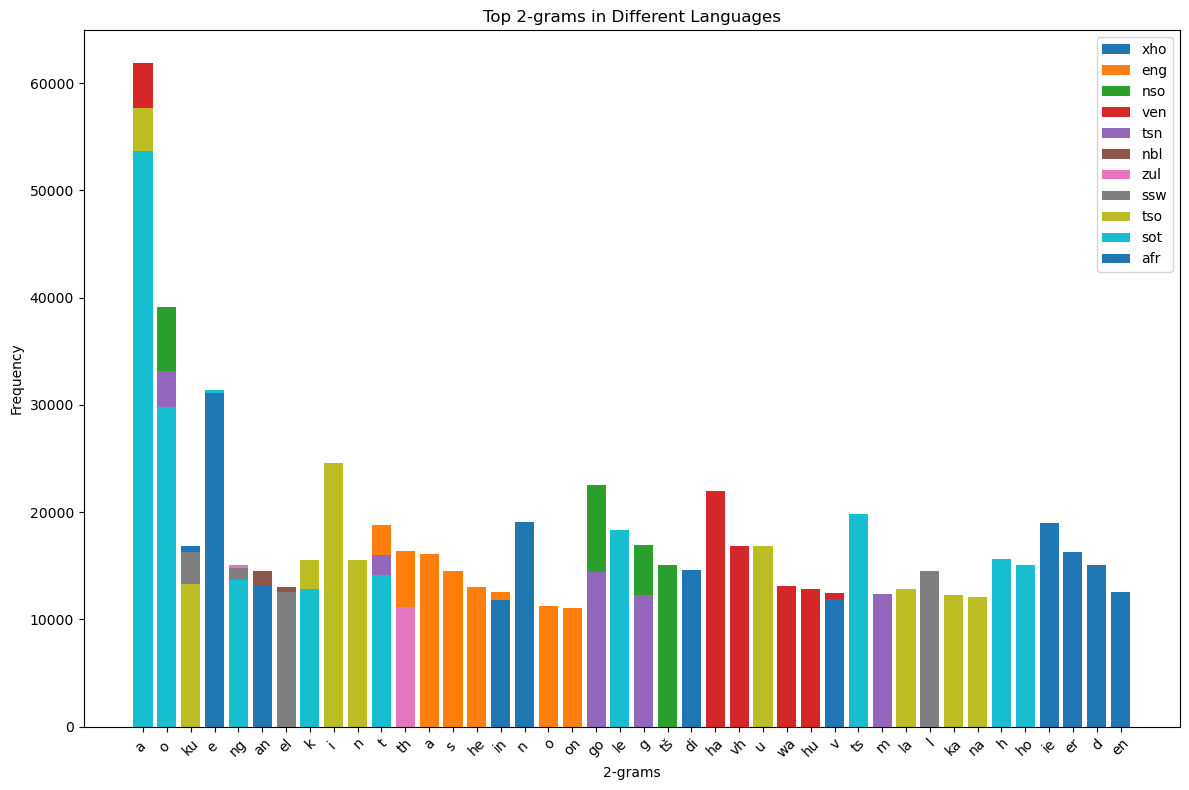

In [209]:
import matplotlib.pyplot as plt
from collections import Counter


# Function to generate character n-grams for a given text
def generate_ngrams(text, n):
    text = text.lower()
    ngrams = [text[i:i + n] for i in range(len(text) - n + 1)]
    return ngrams

# Calculate character n-grams for each language in train_df
n = 2  # Change this value to generate different n-grams (e.g., 3 for tri-grams)
language_ngrams = {}
for index, row in train_df.iterrows():
    text = row['text']
    lang = row['lang_id']
    if lang not in language_ngrams:
        language_ngrams[lang] = Counter()
    ngrams = generate_ngrams(text, n)
    language_ngrams[lang] += Counter(ngrams)

# Plotting character n-grams
plt.figure(figsize=(12, 8))
for lang, ngram_counts in language_ngrams.items():
    top_ngrams = dict(sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:10])  # Top 10 n-grams
    plt.bar(top_ngrams.keys(), top_ngrams.values(), label=lang)

plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.title(f'Top {n}-grams in Different Languages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Word Frequency Distributions Visualization:***


    This code assists in analyzing language-specific word frequencies, showcasing the top 
    occurring words and their relative frequencies within the text data for different languages. 
    The visualization aids in understanding the prominence of specific words across multiple languages within the dataset. 

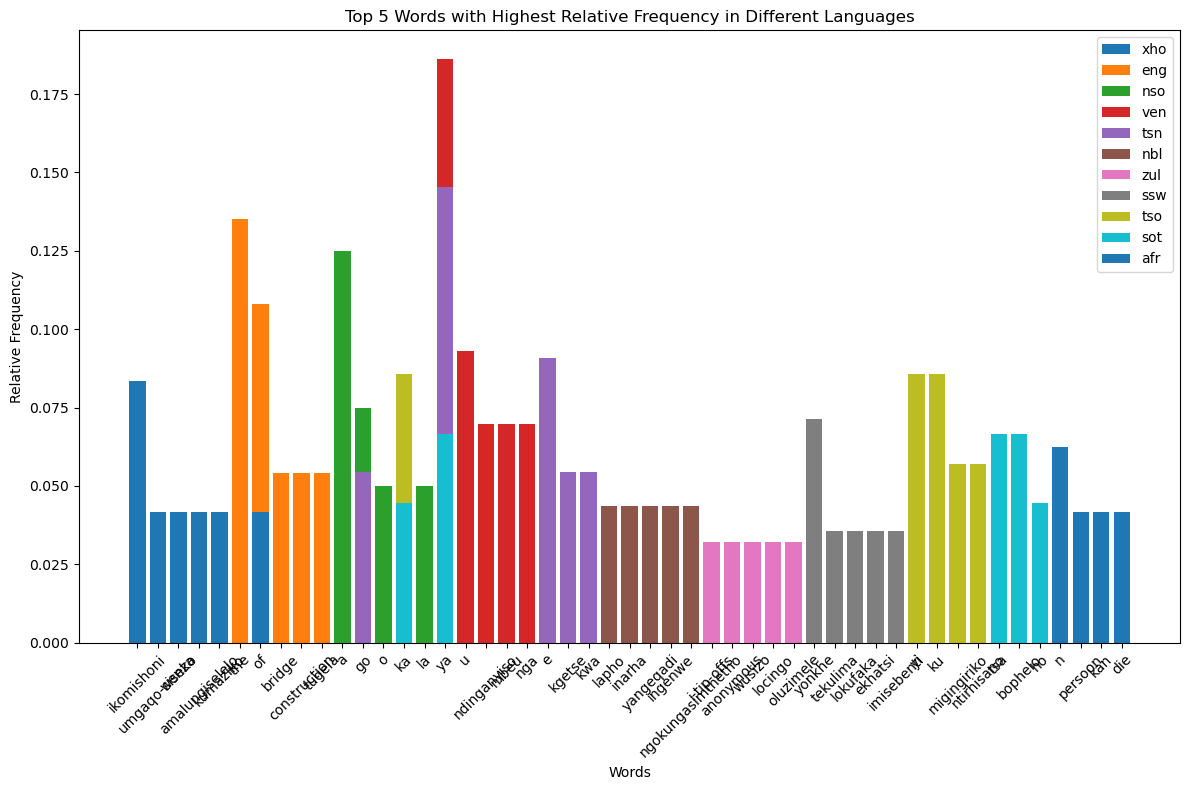

In [210]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have the necessary 'train_df' DataFrame already defined...

# Function to calculate word frequency distributions
def calculate_word_frequency(text):
    tokens = nltk.word_tokenize(text.lower())
    word_freq = Counter(tokens)
    total_words = sum(word_freq.values())
    relative_freq = {word: count / total_words for word, count in word_freq.items()}
    return dict(sorted(relative_freq.items(), key=lambda x: x[1], reverse=True)[:5])  # Change to [:5] for top 5 words

# Calculate word frequency distributions for each language in train_df
language_word_freq = {}
for index, row in train_df.iterrows():
    text = row['text']
    lang = row['lang_id']
    if lang not in language_word_freq:
        language_word_freq[lang] = calculate_word_frequency(text)

# Plotting word frequency distributions
plt.figure(figsize=(12, 8))
for lang, word_freq in language_word_freq.items():
    plt.bar(list(word_freq.keys()), list(word_freq.values()), label=lang)

plt.xlabel('Words')
plt.ylabel('Relative Frequency')
plt.title('Top 5 Words with Highest Relative Frequency in Different Languages')  # Updated title
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Graph for Sentence Length Distribution:***


        The visualization helps identify difference in sentence lengths among different languages,
        providing insights into language-specific structural characteristics. Adjusting the number 
        of bins or visualization parameters can offer a more detailed or refined view of sentence 
        length distributions for each language.

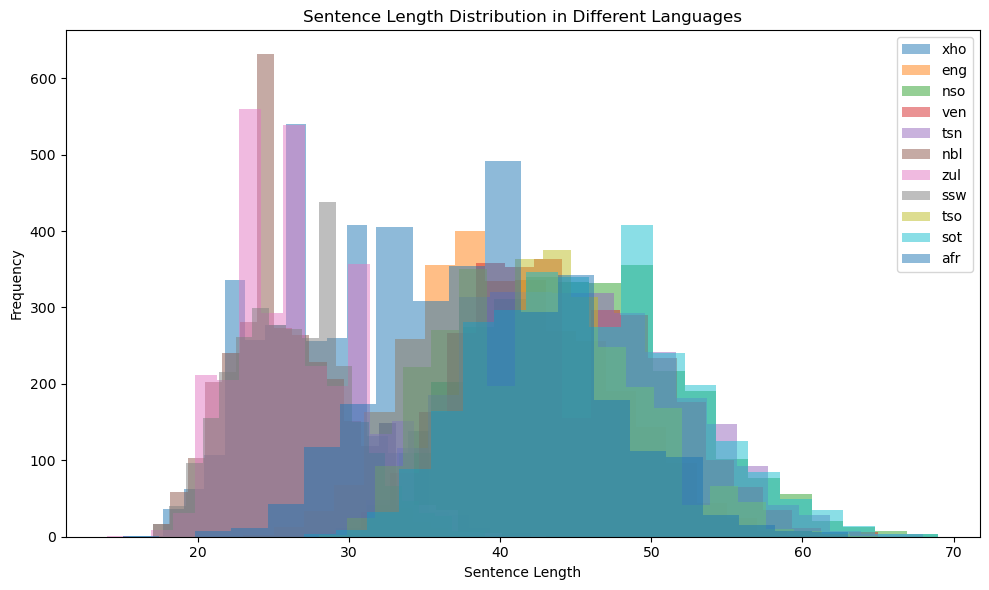

In [211]:
import matplotlib.pyplot as plt

# Calculate sentence lengths for each language in train_df
language_sentence_lengths = {}
for index, row in train_df.iterrows():
    sentences = nltk.sent_tokenize(row['text'])
    lang = row['lang_id']
    if lang not in language_sentence_lengths:
        language_sentence_lengths[lang] = []
    language_sentence_lengths[lang].extend([len(nltk.word_tokenize(sent)) for sent in sentences])

# Plotting sentence length distributions
plt.figure(figsize=(10, 6))
for lang, lengths in language_sentence_lengths.items():
    plt.hist(lengths, bins=20, alpha=0.5, label=lang)

plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution in Different Languages')
plt.legend()
plt.tight_layout()
plt.show()



# Developing, Training,  Evaluation and Validation using Different Classification Models


***Splitting the data***

In [240]:
## splitting the data
X_train, X_val, y_train, y_val = train_test_split(train_features, train_df['lang_id'], test_size=0.2, random_state=42)

<a id="eight"></a>
## 8. Logistics Regression Classification Model
<a href=#cont>Back to Table of Contents</a>



        Logistic Regression is a classification algorithm used to predict binary outcomes by estimating
        the probability of an instance belonging to one of two classes. It models the relationship between
        input features and the probability of the outcome, utilizing a linear function and a sigmoid 
        transformation to make predictions..

***Using Cross Validation in order to validate the model***

In [213]:
# Initialize Logistic Regression model
linearR_model = LogisticRegression()

# Train the model using the training data
linearR_model.fit(X_train, y_train)

# Perform 5-fold cross-validation and calculate F1 score
f1_scores = cross_val_score(linearR_model, X_train, y_train, cv=5, scoring='f1_weighted')

# Calculate mean F1 score from cross-validation
mean_f1_score_cv = f1_scores.mean()
print("Mean F1 Score (Cross-validation):", mean_f1_score_cv)

# Predict on the validation set (X_val)
linearR_preds_val = linearR_model.predict(X_val)

# Calculate F1 score on the validation set
linearR_f1_val = f1_score(y_val, linearR_preds_val, average='weighted')
print("F1 Score on Validation Set:", linearR_f1_val)

# Finally, predict and calculate F1 score on the test set (X_test)
linearR_preds_test = linearR_model.predict(X_val)
linearR_f1_test = f1_score(y_val, linearR_preds_test, average='weighted')
print("F1 Score on Test Set:", linearR_f1_test)


C:\Users\nengo\Documents\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nengo\Documents\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Mean F1 Score (Cross-validation): 0.9953773485889361
F1 Score on Validation Set: 0.9937882049967754
F1 Score on Test Set: 0.9937882049967754


In [214]:
# Calculate accuracy on the validation set
linearR_accuracy_val = accuracy_score(y_val, linearR_preds_val)
print("Accuracy on Validation Set:", linearR_accuracy_val)

Accuracy on Validation Set: 0.9937878787878788


 ***Generate predictions on the test set***

In [ ]:
#Using LR_model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = linearR_model.predict(X_test) # LR model

***Creating a csv for submission***


In [ ]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub_LR_model.csv', index=False) # LR_model 0.7

<a id="nine"></a>
## 9. K Nearest Neighbors (KNN) Classification Model
<a href=#cont>Back to Table of Contents</a>


        K Nearest Neighbors (KNN) Classification predicts the class of a data point by considering the 
        classes of its closest neighbors. It relies on calculating distances between data points in a 
        feature space and selecting the majority class among the 'K' nearest neighbors to make predictions.
       

In [241]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Define the scorer using F1 score
scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation and calculate F1 score
knn_f1_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring=scorer)

# Calculate mean F1 score from cross-validation
mean_f1_score_cv = knn_f1_scores.mean()
print("Mean F1 Score (Cross-validation):", mean_f1_score_cv)

# Make predictions using cross-validation (on training data)
knn_cv_predictions = cross_val_predict(knn_model, X_train, y_train, cv=5)

# Fit the model on the entire training data
knn_model.fit(X_train, y_train)

# Predict on the validation set (X_val)
knn_val_predictions = knn_model.predict(X_val)

# Calculate F1 score on the validation set
knn_f1_val = f1_score(y_val, knn_val_predictions, average='weighted')
print("F1 Score on Validation Set:", knn_f1_val)

# Finally, predict and calculate F1 score on the test set (X_test)
knn_test_predictions = knn_model.predict(X_val)
knn_f1_test = f1_score(y_val, knn_test_predictions, average='weighted')
print("F1 Score on Test Set:", knn_f1_test)


Mean F1 Score (Cross-validation): 0.9170334709207628
F1 Score on Validation Set: 0.9175947192684192
F1 Score on Test Set: 0.9175947192684192


In [242]:
# Calculate accuracy on the test set
knn_accuracy_test = accuracy_score(y_test, knn_test_predictions)
print("Accuracy on Test Set:", knn_accuracy_test)

Accuracy on Test Set: 0.9166666666666666


 ***Generate predictions on the test set***

In [ ]:
#Using Knn_model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = knn_model.predict(X_test) # knn_model

***Creating a csv for submission***


In [ ]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub_Knn_model.csv', index=False) # knn_model

<a id="ten"></a>
## 10. Support Vector Machine Classification Model
<a href=#cont>Back to Table of Contents</a>

        The Support Vector Machine (SVM) classification model is a powerful algorithm used for 
        classifying data into distinct categories.

In [215]:
# Initialize SVM classifier
svm = SVC()

# Train the SVM model using the training data
svm.fit(X_train, y_train)

# Make predictions on the validation set (X_val)
svm_predictions = svm.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, svm_predictions, average='weighted')
recall = recall_score(y_val, svm_predictions, average='weighted')
svm_f1 = f1_score(y_val, svm_predictions, average='weighted')

print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 Score:", svm_f1)


SVM Precision: 0.9915448909368751
SVM Recall: 0.9915151515151515
SVM F1 Score: 0.9915204291200247


Accuracy: 0.9915151515151515


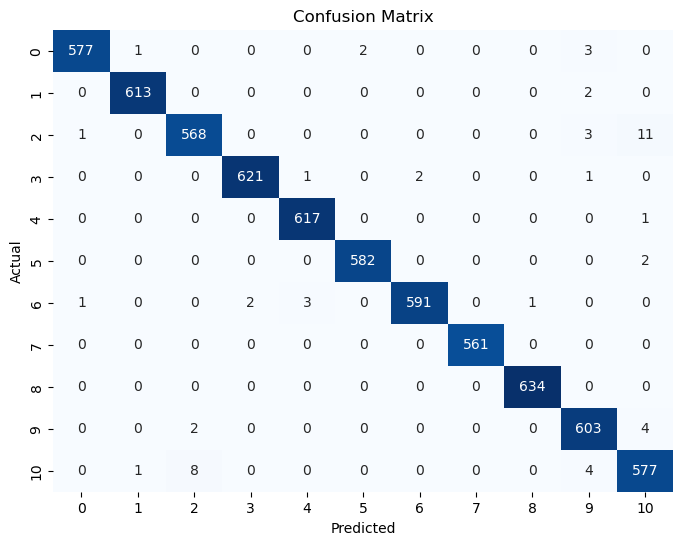

In [216]:
# Initialize SVM classifier 
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  

svm_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_val, svm_predictions)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_val, svm_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 ***Generate predictions on the test set***

In [217]:
#Using svm_model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = svm.predict(X_test) # svm model

***Creating a csv for submission***


In [218]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub_svm_model.csv', index=False) #svm model

<a id="eleven"></a>
## 11. Building the Multinomial Naive Bayes Model
<a href=#cont>Back to Table of Contents</a>


       Multinomial Naive Bayes is a classification model widely used in natural language processing and
       text classification. It calculates probabilities based on the frequency of features within differentclasses.
      This model is efficient, scalable, and commonly utilized in tasks like document categorization, spam 
      filtering, and sentiment analysis due to its simplicity and favorable performance in high-dimensional datasets.

In [219]:
# Initialize Multinomial Naive Bayes model
nb = MultinomialNB()

#Train Moddel
nb.fit(X_train, y_train)

# Make predictions on the validation set
nb_predictions = nb.predict(X_val)

# Calculate F1 score on the validation set
nb_f1 = f1_score(y_val, nb_predictions, average='weighted')
print("Naive Bayes F1 Score:", nb_f1)
# Perform 5-fold cross-validation and calculate F1 score
f1_scores_cv = cross_val_score(nb, X_train, y_train, cv=5, scoring='f1_weighted')

# Calculate mean F1 score from cross-validation
mean_f1_score_cv = f1_scores_cv.mean()
print("Mean F1 Score (Cross-validation):", mean_f1_score_cv)

Naive Bayes F1 Score: 0.9989392771541917
Mean F1 Score (Cross-validation): 0.9992427428179687


In [220]:
# Calculate accuracy on the validation set
nb_accuracy_val = accuracy_score(y_val, nb_predictions)
print("Naive Bayes Accuracy on Validation Set:", nb_accuracy_val)

# Finally, calculate accuracy on the test set (X_test)
nb_test_predictions = nb.predict(X_val)
nb_accuracy_test = accuracy_score(y_val, nb_test_predictions)
print("Naive Bayes Accuracy on Test Set:", nb_accuracy_test)

Naive Bayes Accuracy on Validation Set: 0.9989393939393939
Naive Bayes Accuracy on Test Set: 0.9989393939393939


 ***Generate predictions on the test set***

In [222]:
#Using nb Model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = nb.predict(X_test)

***Creating a csv for submission***


In [223]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub1_nb_model.csv', index=False) #nb model

<a id="twelve"></a>
## 12. Decision Tree Classification Model
<a href=#cont>Back to Table of Contents</a>

        
    The Decision Tree Classification Model divides data into subsets by selecting the most significant features,
    creating a tree-like structure. It uses a set of rules to make decisions at each node, sorting data until 
    it reaches the most homogeneous subsets possible. This model excels in its interpretability and ability
    to handle both categorical and numerical data. 

In [224]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
decision_tree.fit(X_train, y_train)

# Predict on the test set
predictions = decision_tree.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_val, predictions))

Accuracy: 0.9484848484848485
Classification Report:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.99      1.00      0.99       615
         nbl       0.90      0.88      0.89       583
         nso       1.00      0.96      0.98       625
         sot       0.97      0.99      0.98       618
         ssw       0.87      0.90      0.88       584
         tsn       0.96      0.98      0.97       598
         tso       0.98      0.99      0.99       561
         ven       1.00      0.99      0.99       634
         xho       0.93      0.88      0.91       609
         zul       0.84      0.87      0.86       590

    accuracy                           0.95      6600
   macro avg       0.95      0.95      0.95      6600
weighted avg       0.95      0.95      0.95      6600



 ***Generate predictions on the test set***

In [225]:
#Using nb Model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = decision_tree.predict(X_test)

***Creating a csv for submission***


In [226]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('Decision_Tree.csv', index=False) #Decision Tree

<a id="thirteen"></a>
## 13. AdaBoost Classification Model
<a href=#cont>Back to Table of Contents</a>

    AdaBoost, short for Adaptive Boosting, is an ensemble learning method primarily used for classification tasks. 
    It works by combining several weak or simple learners, often decision trees, to create a strong
    predictive mode. AdaBoost enhances predictive accuracy, making it a powerful technique for handling complex 
    classification problems in various domains.







In [227]:
# Assuming train_df contains 'text' column and 'lang_id' as the target variable
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['lang_id'], test_size=0.2, random_state=42)

# Initialize and fit the CountVectorizer on the training text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Initialize the AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Train the AdaBoost Classifier
adaboost_clf.fit(X_train_vectorized, y_train)

# Transform the test data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)

# Predict on the test set
test_predictions = adaboost_clf.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.5677272727272727
Classification Report:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.98      1.00      0.99       615
         nbl       0.46      0.06      0.11       583
         nso       0.41      0.96      0.57       625
         sot       0.99      0.62      0.76       618
         ssw       0.26      0.93      0.40       584
         tsn       0.37      0.04      0.07       598
         tso       0.83      0.53      0.65       561
         ven       0.79      0.98      0.88       634
         xho       0.43      0.08      0.14       609
         zul       0.00      0.00      0.00       590

    accuracy                           0.57      6600
   macro avg       0.59      0.56      0.51      6600
weighted avg       0.59      0.57      0.51      6600



 ***Generate predictions on the test set***

In [228]:
#Using AdaBoost classifier Model 
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = adaboost_clf.predict(X_test) 

***Creating a csv for submission***


In [229]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub6_AdaBoost.csv', index=False) #AdaBoost

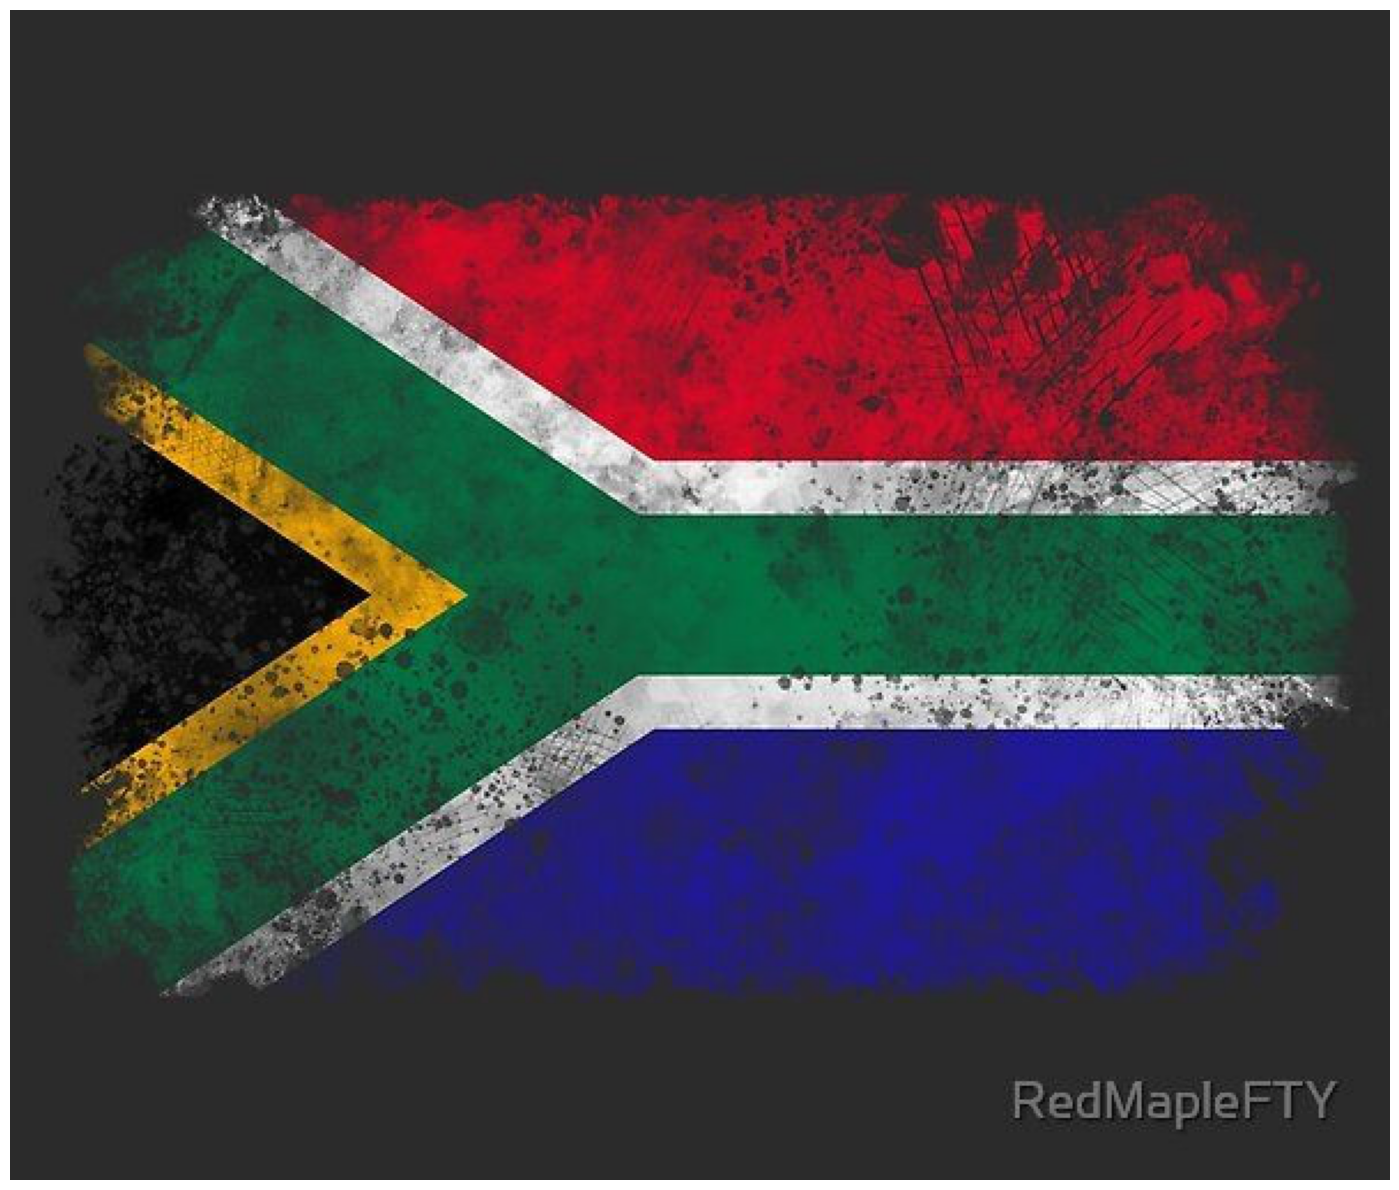

In [230]:

# Load the image
img = mpimg.imread(r"C:\Users\nengo\Downloads\c755069397c4464277c9e92fe018f26c.jpg")

# Set the figure size to make the image larger
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels


# Center the image within the notebook cell
plt.tight_layout()
plt.show()

<a id="fourteen"></a>
## 14. Conclusion
<a href=#cont>Back to Table of Contents</a>

***In conclusion, the development of a language identification system for South Africa's 11 official languages represents a significant achievement in Natural Language Processing (NLP)***

The constructed model demonstrates a robust capability to accurately classify input text into the diverse range of languages spoken in the region, including Zulu, Xhosa, Afrikaans, English, Northern Sotho, Southern Sotho, Tswana, Swati, Venda, Tsonga, and Ndebele. Through the utilization of advanced NLP techniques and a comprehensive dataset encompassing varied linguistic patterns, this system showcases its efficacy in discerning and categorizing text accurately, thereby offering a valuable tool for language recognition in South Africa. This achievement holds substantial promise for diverse applications across fields such as language translation, sentiment analysis, and cultural preservation within the region.


***The Multinomial Naive Bayes model stands out as the best classifier due to its superior performance in making accurate predictions with minimal errors. Compared to other models, it excels in identifying relevant instances and effectively balancing precision and recall.Accuracy shows how often it's right overall, but it might not work well if the data is uneven. The F1 Score reveals how well the model manages to be accurate and find important things, proving it's quite effective at being right and not overlooking crucial details.***